**Butter Filter**

In [1]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

**Data Collection and Cleaning**

In [2]:
import pandas
from os import listdir, getcwd
from os.path import isfile, join
import scipy

In [3]:
path = getcwd()
files = [f for f in listdir(path) if isfile(join(path, f)) and '.csv' in f]
files

['MLCT_B_20D_00A_S10006_0.0075.csv',
 'ar500p_E3_S1_003_0.072.csv',
 'a200pr20nE8S20005_Apr_0.118.csv',
 'a200pr20nE1S20003_Apr_0.118.csv',
 'ar20005_0.0248.csv',
 'iD4_S1_0VacBD0004_Apr_0.089.csv']

In [4]:
data_list = {}
for f in files:
    data_list[f] = pandas.read_csv(f)

In [5]:
for f in files:
    print(data_list[f].columns)

Index(['ZIndex', ' No', 'zSensr', 'defl'], dtype='object')
Index(['No', 'defl', 'zSensr'], dtype='object')
Index(['No', 'zSensr', 'defl'], dtype='object')
Index(['No', 'zSensr', 'defl'], dtype='object')
Index(['No', 'defl', 'zSensr'], dtype='object')
Index(['No', 'defl', 'zSensr'], dtype='object')


In [6]:
data_list[files[0]] = data_list[files[0]].drop([' No'], axis=1)

In [7]:
data_list[files[0]] = data_list[files[0]].rename(columns={'ZIndex':'No'})
for f in files:
    data_list[f] = data_list[f].reindex(columns=['No','zSensr','defl'])

In [8]:
approach_curve = []
approach_constants = []
full_curve = []
full_constants = []
for k in data_list:
    if 'Apr' in k:
        approach_curve.append(data_list[k])
        approach_constants.append(float(k[-9:-4]))
    else:
        full_curve.append(data_list[k])
        full_constants.append(float(k[-9:-4]))
for i in range(len(approach_curve)):
    approach_curve[i].defl *= approach_constants[i]

In [9]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec

**Approach Curve 0**

Text(0, 0.5, 'Z position')

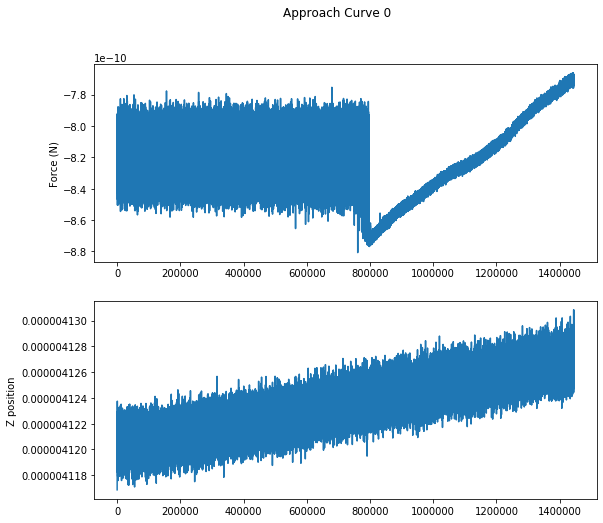

In [14]:
matplotlib.rcParams['agg.path.chunksize'] = 10000
n = 0
d = approach_curve[n].defl * approach_constants[n]
z = approach_curve[n].zSensr
t = approach_curve[n].No

plt.figure(figsize=(9, 8))
plt.suptitle('Approach Curve ' + str(n))
plt.subplot(211)
plt.plot(t, d)
plt.ylabel('Force (N)')
plt.subplot(212)
plt.plot(t, z)
plt.ylabel('Z position')

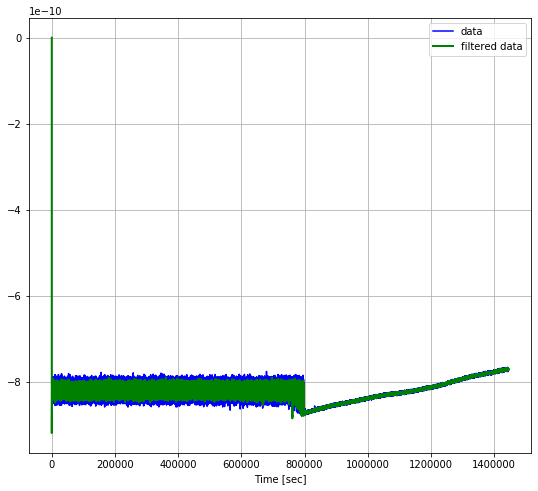

In [19]:
# Filter requirements.
order = 5
fs = 5e4       # sample rate, Hz
cutoff = 3.8e3  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
# w, h = freqz(b, a, worN=8000)
plt.figure(figsize=(9,8))
# plt.subplot(2, 1, 1)
# plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
# plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
# plt.axvline(cutoff, color='k')
# plt.xlim(0, 0.5*fs)
# plt.title("Lowpass Filter Frequency Response")
# plt.xlabel('Frequency [Hz]')
# plt.grid()


# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(d, cutoff, fs, order)

# plt.subplot(2, 1, 2)
plt.plot(t, d, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

**Approach Curve 1**

Text(0, 0.5, 'Z position')

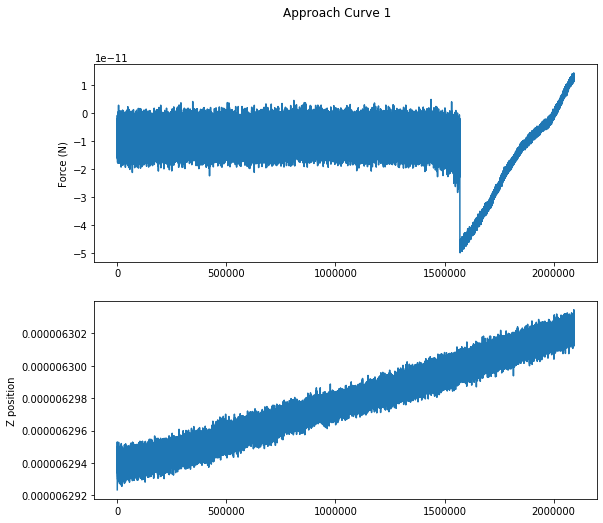

In [11]:
matplotlib.rcParams['agg.path.chunksize'] = 10000
n = 1
d = approach_curve[n].defl * approach_constants[n]
z = approach_curve[n].zSensr
t = approach_curve[n].No

plt.figure(figsize=(9, 8))
plt.suptitle('Approach Curve ' + str(n))
plt.subplot(211)
plt.plot(t, d)
plt.ylabel('Force (N)')
plt.subplot(212)
plt.plot(t, z)
plt.ylabel('Z position')

In [12]:
approach_constants[n]

0.118

**Approach Curve 2**

Text(0, 0.5, 'Z position')

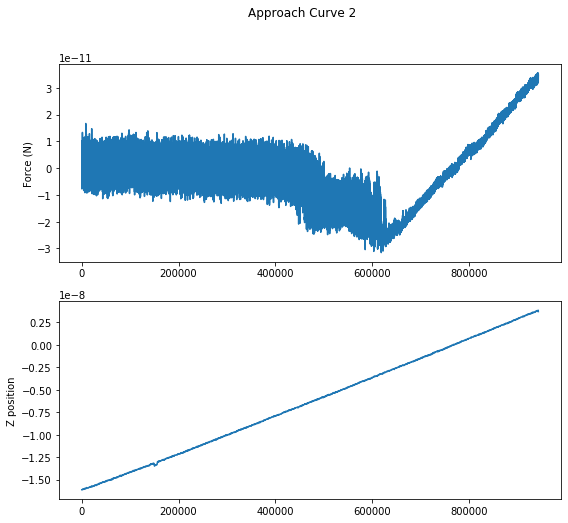

In [14]:
matplotlib.rcParams['agg.path.chunksize'] = 10000
n = 2
d = approach_curve[n].defl * approach_constants[n]
z = approach_curve[n].zSensr
t = approach_curve[n].No

plt.figure(figsize=(9, 8))
plt.suptitle('Approach Curve ' + str(n))
plt.subplot(211)
plt.plot(t, d)
plt.ylabel('Force (N)')
plt.subplot(212)
plt.plot(t, z)
plt.ylabel('Z position')

In [15]:
approach_constants[n]

0.089